In [1]:
# Data Manipulation
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = lambda x: f'{x:0.2f}'

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Preprocesing
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import RandomizedSearchCV

# Algorithms
import tensorflow as tf

# Model Evaluation
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score 

import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8715, 30), (8715, 1), (1772, 30), (1772, 1))

In [3]:
scalar = StandardScaler()
scalar.fit(X_train.values)
scaled_x_train = pd.DataFrame(data=scalar.transform(X_train.values), columns=X_train.columns.to_list())
scaled_x_test = pd.DataFrame(data=scalar.transform(X_test.values), columns=X_test.columns.to_list())

Cumulative Variances (Percentage):
[26.51315439 35.87802332 41.28610065 46.32927672 51.19965779 55.31362131
 59.40489093 63.3052657  67.13107622 70.84625923 74.27412536 77.41021847
 80.23282248 82.97781013 85.12583039 87.12110245 88.91413621 90.55941687
 92.01092542 93.31699287 94.47534686 95.5953729  96.64533783 97.53608835]
Number of components: 24


Text(0, 0.5, 'Explained variance (%)')

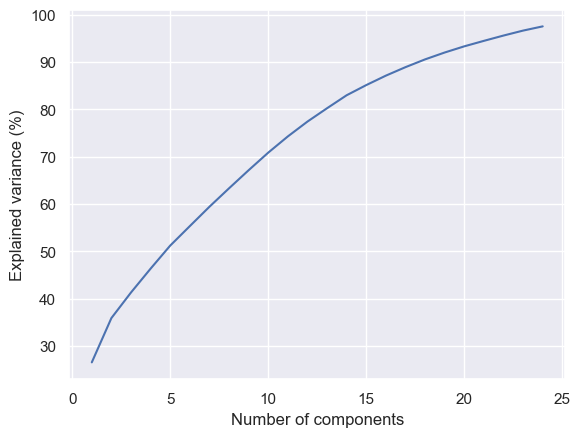

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = .975)
pca.fit(scaled_x_train.values)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [7]:
X_train_pca = pca.transform(scaled_x_train)
X_test_pca = pca.transform(scaled_x_test)

In [13]:
X_train_pca.shape, X_test_pca.shape, y_train.shape, y_test.shape

((8715, 24), (1772, 24), (8715, 1), (1772, 1))

In [12]:
input_size = 24
ouput_size = 1

tf.keras.Sequential([
    tf.keras.layers.Dense()
])

(numpy.ndarray,
 (8715, 24),
 array([[-4.60970646, -2.49590029,  0.50348121,  0.79101816, -2.14754678,
         -0.81869384, -1.03814187,  1.73720593, -0.53107327, -1.24780524,
         -0.47605982,  1.72786188,  0.01989438,  0.60825611,  0.96668701,
         -1.16940781, -1.05770973,  1.02364279,  0.1724817 ,  0.15926614,
          0.49524025, -0.366198  , -0.4576185 ,  0.11858231],
        [-3.33626797, -0.93395009,  0.3944408 , -0.7845276 , -0.94006999,
         -2.25020343, -2.03929333,  0.85679941, -1.66709481,  0.74077039,
         -2.90873146, -1.25132084, -0.39133407,  0.51270383,  0.41744524,
         -1.10806732, -0.83958795, -0.03966133, -0.49706278,  0.21738416,
          0.06011267,  0.60444621, -0.22514857, -0.77549079],
        [-0.63073253,  0.74970327, -0.21346017,  2.4298415 ,  2.10773947,
         -0.15262428,  1.56274306, -0.5586873 , -0.98645111, -0.48094226,
          0.50391617,  0.65620519,  0.19784135,  0.99150636, -1.25168686,
          0.26932757, -0.758644  